# Importing Libraries and Dataset 

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib as plt


In [2]:
# Importing the libraries of Keras and sklearn

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Setting the seed for numpy

from numpy.random import seed
seed(2)

In [4]:
# Setting the seed for the tensorflow

from tensorflow.python import set_random_seed
set_random_seed(2)

In [5]:
# Reading the Excel file for Concrete Data to predict the Concrete Strength based on other attributes

df = pd.read_excel('C:\\Users\\hites\\Concrete_Data.xls',Sheet='Sheet1')

In [6]:
# Details about the attributes including data type and non null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
# Converting the Age into float64 to make all the input features of the same datatype

df['Age (day)'] = df['Age (day)'].astype("float64")

In [8]:
# Attributes distribution in terms of mean, median and IQR

df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [9]:
# Names of the columns

df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Input and Output Features Pre-Processing including Normalizing and Train and Validation split

In [10]:
# Defining the Input features

X = df.iloc[:,0:8]

In [11]:
# Defining the output/target variable 

y = df[['Concrete compressive strength(MPa, megapascals) ']]

In [12]:
# Defining the MinMaxScaler for normalizing the input and output features

minmax = MinMaxScaler()

In [13]:
# Normalizing the input features 

X = minmax.fit_transform(X)

In [14]:
# Normalizing the output/target variable

y = minmax.fit_transform(y)

In [15]:
# Splitting the data into 80:20 ratio with 80% as training data and 20% as validation data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(824, 8)

In [17]:
y_train

array([[0.31581027],
       [0.74402584],
       [0.26746723],
       [0.38703637],
       [0.06311739],
       [0.31694412],
       [0.19878369],
       [0.57626827],
       [0.46554656],
       [0.02782216],
       [0.13656823],
       [0.43153121],
       [0.25166211],
       [0.85921421],
       [0.28999688],
       [0.92071673],
       [0.7550207 ],
       [0.18947242],
       [0.48240822],
       [0.24327853],
       [0.55814393],
       [0.17656204],
       [0.25398134],
       [0.34125307],
       [0.21927881],
       [0.09076775],
       [0.45747221],
       [0.49586834],
       [0.4608308 ],
       [0.40060815],
       [0.32098129],
       [0.45188888],
       [0.6408631 ],
       [0.06208662],
       [0.37987253],
       [0.51135563],
       [0.65812847],
       [0.40979917],
       [0.80192067],
       [0.35568383],
       [0.92776031],
       [0.19475511],
       [0.65696026],
       [0.77202838],
       [0.39202701],
       [0.54328368],
       [0.4351389 ],
       [0.280

# Keras Neural Network Model Creation for training the NN with d-2d-1 configuration d is 8 here input features dimension

In [18]:
# Creating a Keras Neural Networks Model with Input dimension as 8 and 1 Hidden layer with sigmoid activation function and 1 output layer

model = Sequential()
model.add(Dense(16, input_dim=8,use_bias=True, activation='sigmoid')) # Hidden layer with 16 neurons as d=8 so 2d = 16
model.add(Dense(1, activation='linear')) # Output layer with 1 neuron
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Defining the loss function and Metrics to be used for evaluation as MSE and Optimizer as Adam

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Training the Neural Network 

In [20]:
# Training the NN model with scaled Input and Output with 150 Epochs and batch_size of 30 to see the MSE at each epoch 
# for training and validation split of the data

history = model.fit(X_train, y_train, epochs=150, batch_size=824,  verbose=1, validation_data=(X_val, y_val))

Epoch 1/150
1/1 [==============================] - 0s 123ms/step - loss: 0.5738 - mse: 0.5738 - val_loss: 0.5351 - val_mse: 0.5351
Epoch 2/150
1/1 [==============================] - 0s 29ms/step - loss: 0.5545 - mse: 0.5545 - val_loss: 0.5165 - val_mse: 0.5165
Epoch 3/150
1/1 [==============================] - 0s 28ms/step - loss: 0.5356 - mse: 0.5356 - val_loss: 0.4981 - val_mse: 0.4981
Epoch 4/150
1/1 [==============================] - 0s 29ms/step - loss: 0.5171 - mse: 0.5171 - val_loss: 0.4802 - val_mse: 0.4802
Epoch 5/150
1/1 [==============================] - 0s 36ms/step - loss: 0.4990 - mse: 0.4990 - val_loss: 0.4627 - val_mse: 0.4627
Epoch 6/150
1/1 [==============================] - 0s 33ms/step - loss: 0.4813 - mse: 0.4813 - val_loss: 0.4455 - val_mse: 0.4455
Epoch 7/150
1/1 [==============================] - 0s 31ms/step - loss: 0.4639 - mse: 0.4639 - val_loss: 0.4288 - val_mse: 0.4288
Epoch 8/150
1/1 [==============================] - ETA: 0s - loss: 0.4470 - mse: 0.447 - 

# Plotting the MSE for Training and Validation vs Epochs on the same graph

In [21]:
# Epoch values assigned to epoch_x for plotting it on the x axis

epoch_x = history.epoch

In [22]:
# MSE values assigned to MSE_y for plotting MSE on y axis for the Training MSE

MSE_y = history.history['mse']

In [23]:
# MSE values assigned to MSE_val_y for plotting MSE on y axis for the Validation MSE

MSE_val_y = history.history['val_mse']

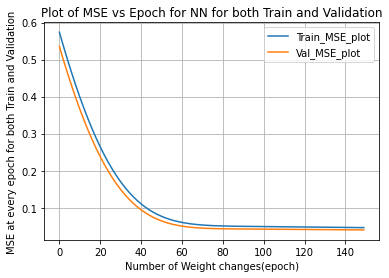

In [24]:
# Plot shows both the Train and validation MSE change wrt number of epochs

# Plotting the Number of weight changes and MSE on x and y axis respectively to see how the MSE changes wrt to changes in the weights after each epoch

from matplotlib import pyplot as plt
plt.plot(epoch_x,MSE_y,label='Train_MSE_plot')
plt.plot(epoch_x,MSE_val_y, label= 'Val_MSE_plot')
plt.grid()
plt.ylabel('MSE at every epoch for both Train and Validation')
plt.xlabel('Number of Weight changes(epoch)')
plt.title('Plot of MSE vs Epoch for NN for both Train and Validation')
plt.legend()

Text(0.5, 1.0, 'Plot of MSE(validation) vs Epoch for NN')

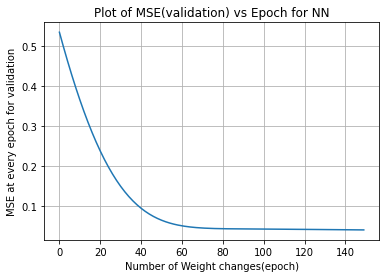

In [25]:
# Plotting only the MSE vs Epochs for Validation data

# Plotting the Number of weight changes and MSE on x and y axis respectively to see how the MSE changes wrt to changes in the weights after each epoch

from matplotlib import pyplot as plt
plt.plot(epoch_x,MSE_val_y)
plt.grid()
plt.ylabel('MSE at every epoch for validation')
plt.xlabel('Number of Weight changes(epoch)')
plt.title('Plot of MSE(validation) vs Epoch for NN')